Average energy of the first 10 songs : 65.1
Average Length of the first 10 songs : 195.6

Genre
atl hip hop          200
australian pop       210
big room             164
boy band             181
brostep              396
canadian hip hop     579
canadian pop         382
country rap          272
dance pop           1621
dfw rap              333
edm                  656
electropop           389
escape room          173
latin               1126
panamanian pop       514
pop                 1368
pop house            153
r&b en espanol       162
reggaeton            427
reggaeton flow       611
trap music           131
Name: Length., dtype: int64

sorting the results form top to bottom based on the sum of lengths
Genre
dance pop           1621
pop                 1368
latin               1126
edm                  656
reggaeton flow       611
canadian hip hop     579
panamanian pop       514
reggaeton            427
brostep              396
electropop           389
canadian pop         382
df

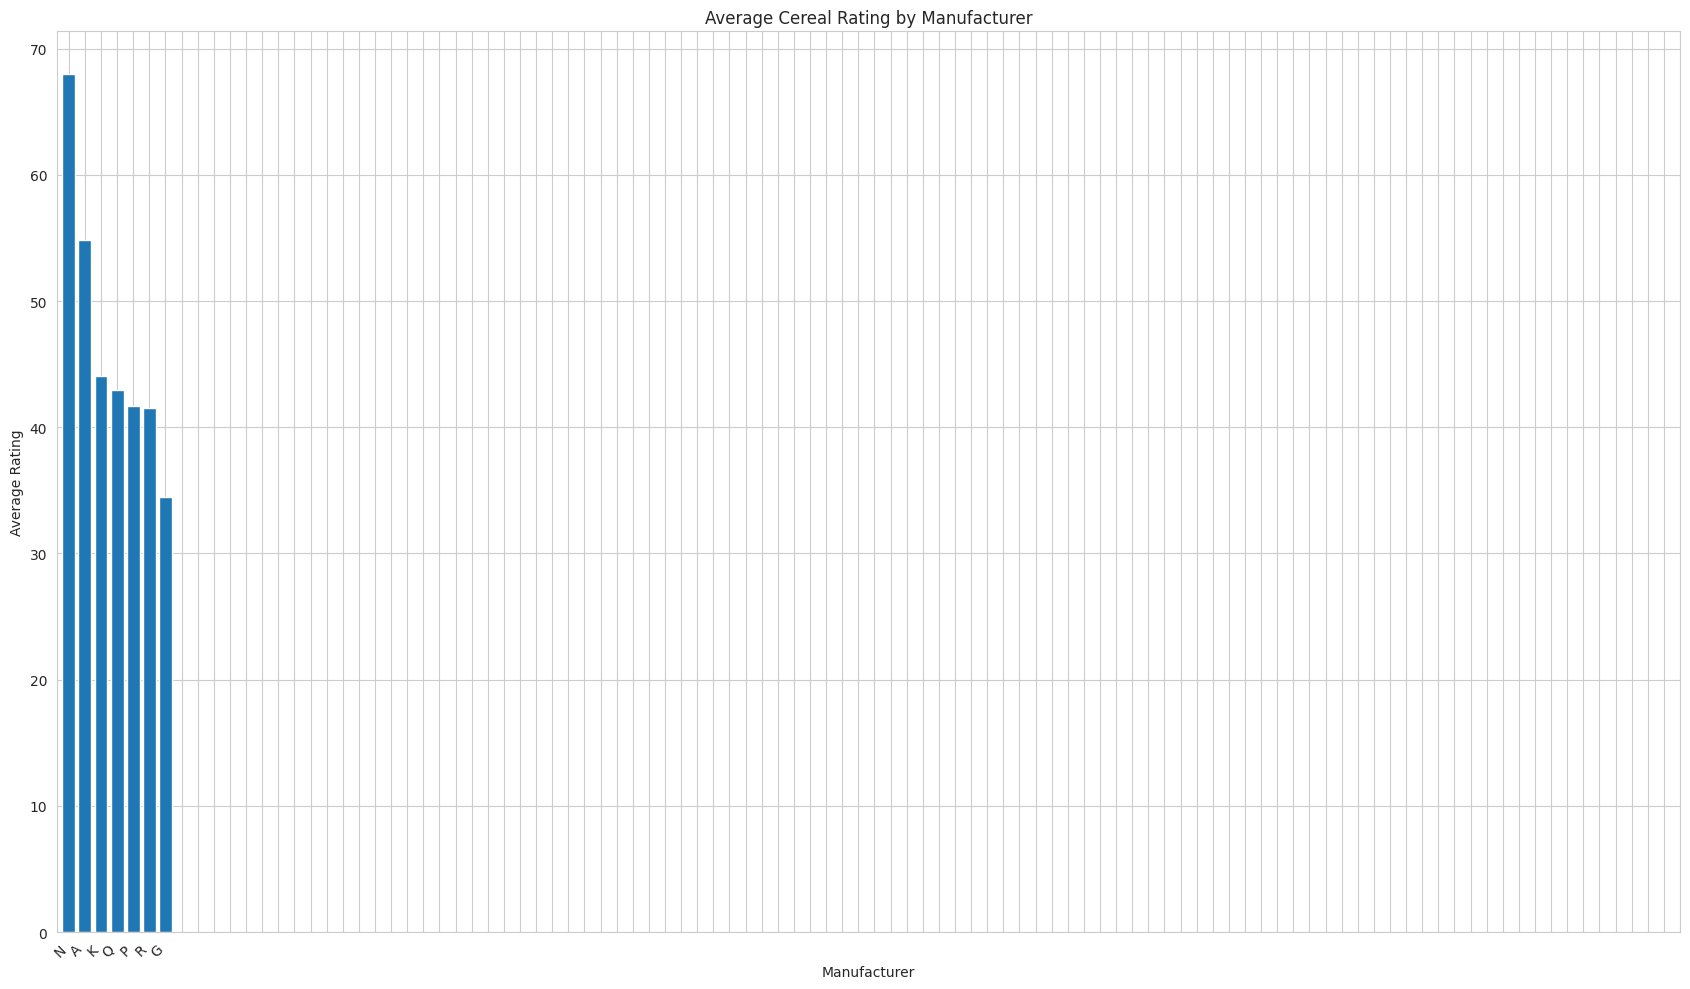

In [ ]:
"""Problem Statement 1: Samantha has created a dataset named 'top50spotify.csv' of her top 50 songs from spotify.

Tasks to be performed:
1. Import the dataset as a DataFrame and drop the first column.
2. Save it as 'top50.csv'.
3. Find the average Energy and Length of first 10 songs.
4. Find the total length of songs, group by genre from top to bottom.
5. Print the artist name with the most number of tracks in one genre. (Hint: Group by artist
name and genre)
6. Print the data of the tracks created by the artist from the previous question.

"""

import pandas as pd

# 1. Import the dataset as a DataFrame and drop the first column.
df = pd.read_csv('top50spotify.csv')
df
df.drop(['SerialNo.'] , axis = 1 , inplace = True)
df

# 2. save it as 'top50.csv'
df.to_csv('top50.csv') # file saved successfully.
df

# 3.Find the average Energy and Length of first 10 songs.
avg_energy = df['Energy'].head(10).mean()
avg_length = df['Length.'].head(10).mean()

print('Average energy of the first 10 songs :', avg_energy)
print('Average Length of the first 10 songs :', avg_length)
print()

# 4. Find the total length of songs, group by genre from top to bottom.
grouped_df = df.groupby('Genre')['Length.'].sum()
print(grouped_df)
print()
print('sorting the results form top to bottom based on the sum of lengths')
sorted_df = grouped_df.sort_values(ascending=False)
print(sorted_df)

# 5. Print the artist name with the most number of tracks in one genre. (Hint: Group by artist name and genre)
# grouping the DataFrame by artist name and genere , and counting the number of tracks .
grouped_df2 = df.groupby(['Artist.Name' , 'Genre']).size()
print(grouped_df2)
print()
# Unstacking the grouped DataFrame to create a new DataFrame with artists as rows and genres as columns.
unstacked_df = grouped_df2.unstack(fill_value=0)
unstacked_df
# getting the index of the column with the maximum value for each row .
max_genre_idx = unstacked_df.idxmax(axis=1)
max_genre_idx
print()
# Selecting the artist names and maximum genre counts .
artist_with_most_tracks = pd.Series(max_genre_idx).value_counts().head(1)
artist_with_most_tracks
# printing the artist name with the most number of tracks in one genre.
artist_name = artist_with_most_tracks.index[0]
print()


# 6. Printing  the data of the tracks created by the artist from the previous question.
artist_tracks = df[df['Artist.Name'] == artist_name]

# Printing the data of the artist's tracks.

artist_tracks



""" Problem Statement 2: Write a Python program to perform the following :

-tasks1.Create a pandas series from the below dictionary where indices are subjects:

{'English':{'Sam':60,'Jackson':74,'Ahree':85},
{'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
{'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
{'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
{'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
}
"""

# creating a dictionary of dictionaries
subjects = {
    'English':{'Sam':60,'Jackson':74,'Ahree':85},
    'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
    'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
    'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
    'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
}

series = pd.Series(subjects)
series

 # 2.Convert the created series into DataFrame and replace the null values with zeroes.

df2 = pd.DataFrame(subjects)
# replacing the null values with zeroes
df2.fillna(0, inplace=True)
# printing the dataframe
df2



# 3.Transpose the DataFrame and create a new column 'Average' and fill the values in it by calculating the average of all subjects.
df3 = df2.transpose()
# adding a new column named 'Average'
df3['Average'] = df3.mean(axis=1)
df3



"""
Problem Statement 3: Write a Python program to create a series from 1 to 1000 and select
only numbers divisible by 7 and 17.

"""
# creating a series from 1 to 1000
series = pd.Series(range(1,1001))

# selecting numbers which are divisible by 7 and 17 .

div = series[(series % 7 == 0) & (series % 17 == 0)]

# printing the series
div


"""
Problem Statement 4: Sylphia has a dataset of various cereals sold in the supermarket.
Dataset Description:
cereal.csv - The dataset contains 16 features. Here's a brief description of 3 columns in the
dataset:
• name - Brand name of the cereals
• MFR - Manufacturer of the brands
• rating - Rating of the cereals
Syliphia wants to visualize the quality of cereals and determine which manufacturer delivers
the best quality.
Tasks to be performed:
1. Import the dataset.
2. Plot ratings of different types of manufacturers.
3. Use xticks range form 0-100.
4. Change the style of the graph to seaborn

"""
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset
df4 = pd.read_csv('cereal.csv')
df4

# selecting the desired columns
df_selected = df4[['name' , 'mfr' , 'rating']]

# grouping the data by manufacturer and calculating the average rating.
avg_rating = df_selected.groupby('mfr')['rating'].mean().sort_values(ascending=False)


# setting seaborn style
sns.set_style('whitegrid')

# Bar plot of average rating by manufacturer
plt.figure(figsize=(17,10))
plt.bar(avg_rating.index , avg_rating.values)
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.title('Average Cereal Rating by Manufacturer')
plt.xticks(range(0,101) , rotation=45 , ha= 'right')
plt.tight_layout()
plt.show()



